In [3]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

# Boston Marathon

We are going to be looking at data from the Boston Marathon. Our goal here is to try and separate the data into informative groups or clusters to better prepare ourselves for future learning. First let's clean up the data, eliminating columns we won't be using and getting rid of null values. 

In [1]:
data = pd.read_csv('https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv')

In [2]:
data


,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
5,32.58,"Sumgong, Jemima Jelagat",4,82.45,F,29,140.68,F3,4,NaN,...,28,5.37,NaN,99.33,16.22,69.47,65.83,KEN,Nandi,132.95
6,17.65,"Hug, Marcel E.",4,47.67,M,28,84.65,W4,4,NaN,...,4,3.23,NaN,58.60,8.38,39.72,37.65,SUI,Neuenkirch,79.83
7,30.48,"Geneti, Markos",5,76.95,M,29,129.83,5,5,NaN,...,5,4.97,NaN,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80
8,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,NaN,...,3,3.10,NaN,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70
9,30.48,"Hall, Ryan",20,77.68,M,31,137.83,6,20,NaN,...,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83


In [20]:
#Converting male and female to binary qualifiers.
data['male'] = data.gender.apply(lambda x: 0 if x =='F'  else 1 )
males = data['male'].values

In [23]:
list(data)

['10k',
 'name',
 'division',
 '25k',
 'gender',
 'age',
 'official',
 'bib',
 'genderdiv',
 'ctz',
 '35k',
 'overall',
 'pace',
 'state',
 '30k',
 '5k',
 'half',
 '20k',
 'country',
 'city',
 '40k',
 'male']

In [24]:
data.drop(data.columns[[1,4,7,9,13,18,19]], axis=1, inplace=True)

In [49]:
#Using Male or Female as our y.
X=data
y=males
X = X.replace(to_replace='-', value=0)

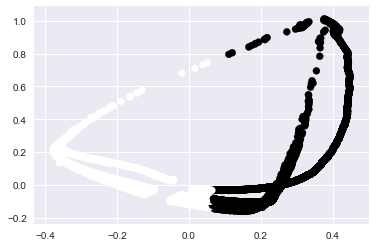

Comparing k-means clusters against the data:
col_0      0     1
row_0             
0      14333  8116
1         34  9501


In [54]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
kmeans=KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)
y_pred = kmeans.predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [55]:
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))


Comparing k-means and mini batch k-means solutions:
col_0      0     1
row_0             
0       1955  9534
1      20494     1


In [56]:
#assign labels:
data['cluster_Kmean']= kmeans.labels_
#check stats for each cluster
data.groupby('cluster_Kmean').mean()

,division,age,official,genderdiv,overall,pace,male
cluster_Kmean,,,,,,,
0,2207.323222,43.095372,263.666202,9458.415163,20166.475077,10.063712,0.361531
1,1285.673519,40.786576,194.334928,4737.561930,5987.894913,7.420282,0.996434


In [57]:
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))


Comparing k-means and mini batch k-means solutions:
col_0      0     1
row_0             
0      14697    12
1       7752  9523


In [58]:
#assign labels:
data['cluster_min_Kmean']= minibatchkmeans.labels_
#check stats for each cluster
data.groupby('cluster_min_Kmean').mean()

,division,age,official,genderdiv,overall,pace,male,cluster_Kmean
cluster_min_Kmean,,,,,,,,
0,2134.291522,40.485893,257.411764,7419.974369,18775.960636,9.825268,0.024747,0.000816
1,1760.798958,44.042894,230.723963,8588.376961,13524.525152,8.807686,0.998726,0.551259


Based on the statistics in our table above, and the confusion matrix from both the mini batch and the original kmeans I do not think our clustering is very productive. Our statistics don't define a very clear picture of distinct groups and we are making a lot of errors in both of our trials. Let's try using offical times as our y and using less features to try and paint a clearer picture.

In [59]:
#Using Official times as Y and only 3 features as X
X=data[['age', 'overall', 'male']]
y=data.official

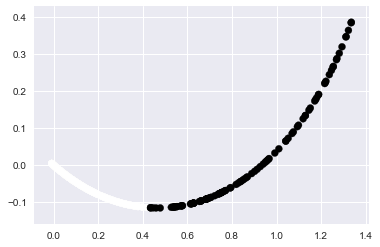

Comparing k-means clusters against the data:
official  80.60   81.23   84.65   84.70   84.82   84.88   85.25   85.38   \
row_0                                                                      
0              0       0       0       0       0       0       0       0   
1              1       2       1       1       1       1       1       1   

official  86.90   86.95    ...    448.92  451.63  455.65  457.55  461.87  \
row_0                      ...                                             
0              0       0   ...         1       1       1       1       1   
1              1       2   ...         0       0       0       0       0   

official  472.57  473.17  479.80  534.22  538.88  
row_0                                             
0              1       1       1       1       1  
1              0       0       0       0       0  

[2 rows x 11030 columns]


In [60]:
X_norm = normalize(X)
# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
kmeans=KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)
y_pred = kmeans.predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [61]:
#assign labels:
data['cluster_Kmean2']= kmeans.labels_
data.groupby('cluster_Kmean2')[['age', 'overall', 'male']].mean()

,age,overall,male
cluster_Kmean2,,,
0,42.438122,15992.997804,0.549895
1,33.158879,27.906542,0.822430


These clusters define a much clearer picture than our previous attempt. Here we are separating the data into two groups of "elite runners" and "recreation runners". By using less features we can see that the elite running group is on average about 9 years younger and predominantly male. Let's run the model again breaking down the data into even more groups.

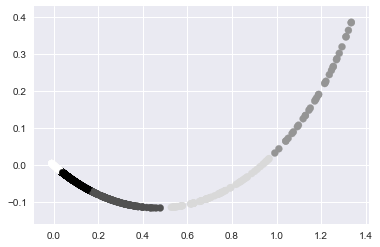

Comparing k-means clusters against the data:
official  80.60   81.23   84.65   84.70   84.82   84.88   85.25   85.38   \
row_0                                                                      
0              0       0       0       0       0       0       0       0   
1              0       0       0       0       0       0       0       0   
2              1       2       1       1       1       1       1       1   
3              0       0       0       0       0       0       0       0   
4              0       0       0       0       0       0       0       0   

official  86.90   86.95    ...    448.92  451.63  455.65  457.55  461.87  \
row_0                      ...                                             
0              0       0   ...         1       1       1       1       1   
1              0       0   ...         0       0       0       0       0   
2              1       2   ...         0       0       0       0       0   
3              0       0   ...         0  

In [62]:
#5 Clusters instead of 2
X_norm = normalize(X)

kmeans=KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_norm)
y_pred = kmeans.predict(X_norm)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [63]:
#assign labels:
data['cluster_Kmean3']= kmeans.labels_
data.groupby('cluster_Kmean3')[['age', 'overall', 'male']].mean()

,age,overall,male
cluster_Kmean3,,,
0,42.623539,16360.928324,0.540398
1,32.656716,35.253731,0.716418
2,34.514286,9.485714,1.000000
3,31.628319,111.079646,0.893805
4,35.104928,504.329094,0.961844


Although interesting I don't think 5 groups is quite as useful as our 2 clusters were. We will try our model one more time with 3 groups. 

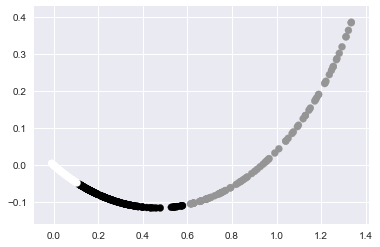

Comparing k-means clusters against the data:
official  80.60   81.23   84.65   84.70   84.82   84.88   85.25   85.38   \
row_0                                                                      
0              0       0       0       0       0       0       0       0   
1              1       2       1       1       1       1       1       1   
2              0       0       0       0       0       0       0       0   

official  86.90   86.95    ...    448.92  451.63  455.65  457.55  461.87  \
row_0                      ...                                             
0              0       0   ...         1       1       1       1       1   
1              1       2   ...         0       0       0       0       0   
2              0       0   ...         0       0       0       0       0   

official  472.57  473.17  479.80  534.22  538.88  
row_0                                             
0              1       1       1       1       1  
1              0       0       0       0

In [64]:
#5 Clusters instead of 2
X_norm = normalize(X)

kmeans=KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_norm)
y_pred = kmeans.predict(X_norm)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [65]:
#assign labels:
data['cluster_Kmean4']= kmeans.labels_
data.groupby('cluster_Kmean4')[['age', 'overall', 'male']].mean()

,age,overall,male
cluster_Kmean4,,,
0,42.497318,16087.460995,0.547747
1,33.611111,23.677778,0.822222
2,32.368932,146.514563,0.902913


Breaking our groups into 3 lends to some interesting results. Our group of super elite runners here is represented by 1 and has a slightly older age and less amount of males than our regular group of elite runners. Our group of recreational runners remains older and less males as we would expect. I think either of models for 2 clusters or 3 clusters using overall times and 3 features presents meaningful groups which would be useful to us in the future.